In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
from utils import *
from model import *

In [3]:
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device='cuda'

CUDA Available? True


In [4]:

train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=train_transforms)


#### Define model parameters

In [5]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

### Check sample images

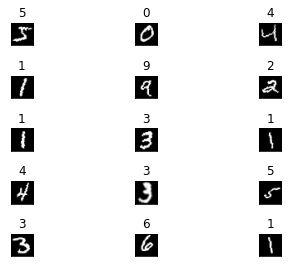

In [6]:
plot_sample(train_loader,15)

### Model training

In [7]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=10.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 5

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, train_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0010e+01.
Epoch 1


Train: Loss=nan Batch_id=117 Accuracy=9.94: 100%|██████████| 118/118 [00:06<00:00, 17.92it/s]                          


Test set: Average loss: nan, Accuracy: 5923/60000 (9.87%)

Adjusting learning rate of group 0 to 1.0010e+01.
Epoch 2


Train: Loss=nan Batch_id=117 Accuracy=9.87: 100%|██████████| 118/118 [00:06<00:00, 18.98it/s]


Test set: Average loss: nan, Accuracy: 5923/60000 (9.87%)

Adjusting learning rate of group 0 to 1.0010e+01.
Epoch 3


Train: Loss=nan Batch_id=117 Accuracy=9.87: 100%|██████████| 118/118 [00:06<00:00, 18.79it/s]


Test set: Average loss: nan, Accuracy: 5923/60000 (9.87%)

Adjusting learning rate of group 0 to 1.0010e+01.
Epoch 4


Train: Loss=nan Batch_id=117 Accuracy=9.87: 100%|██████████| 118/118 [00:06<00:00, 18.99it/s]


Test set: Average loss: nan, Accuracy: 5923/60000 (9.87%)

Adjusting learning rate of group 0 to 1.0010e+01.
Epoch 5


Train: Loss=nan Batch_id=117 Accuracy=9.87: 100%|██████████| 118/118 [00:06<00:00, 18.94it/s]


Test set: Average loss: nan, Accuracy: 5923/60000 (9.87%)

Adjusting learning rate of group 0 to 1.0010e+01.
